In [293]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_sauvola
from skimage import img_as_ubyte

import os

# A command line argument.
input_dir = "C:/Users/dartix/PycharmProjects/kiv-zvi/SP/data_katastr/"


img_names = os.listdir(input_dir)

input_name = input_dir + img_names[2]

print(input_name)




C:/Users/dartix/PycharmProjects/kiv-zvi/SP/data_katastr/UAZK-B2-a-04-C-1425-007.JPG


##### LOADING BW

In [294]:
def load_BW():
    return cv2.imread(input_name, cv2.IMREAD_GRAYSCALE)


#### LOADING COLORED

In [295]:
# It reads the image from the file.
def load_colored():
    # img = img[:,:,0]
    return cv2.cvtColor((cv2.imread(input_name,  cv2.COLOR_BGR2RGB)),  cv2.COLOR_BGR2RGB)

- convolving image by horizontal line detection mask

In [296]:
def convolve_horizontal_lightly(img):
    kernel_horizontal_lines = np.array([[-1,-1,-1],
                                        [2, 2, 2],
                                        [-1,-1,-1]])

    return cv2.filter2D(img, -1, kernel_horizontal_lines)

- convolving image by vertical line detection mask

In [297]:
def convolve_vertical_lightly(img):
    kernel_horizontal_lines = np.array([[-1,2,-1],
                                        [-1, 2, -1],
                                        [-1,2,-1]])

    return cv2.filter2D(img, -1, kernel_horizontal_lines)

- A Canny edge detector 

In [298]:
# img = cv2.Canny(img, 1, 500)
# ...
# kernel = np.ones((3,3), np.uint8)
# kernel[:,:] = 5
# print(kernel)
# img = cv2.dilate(img, kernel)
# img = cv2.erode(img, kernel)
# img = cv2.bitwise_not(img)

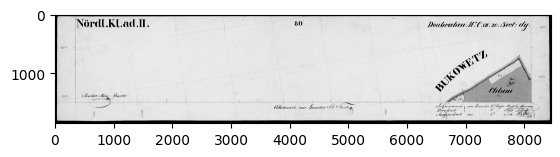

In [299]:
img = load_BW()

assert img is not None, "file could not be read, check with os.path.exists()"




plt.imshow(img, cmap="gray")

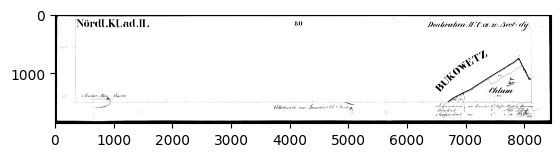

In [300]:

ret, thresh1 = cv2.threshold(img,100,155,cv2.THRESH_OTSU)

plt.imshow(thresh1, cmap="gray")
img = thresh1

In [301]:
# sauvola = (cv2.imread(input_name, cv2.IMREAD_GRAYSCALE))
# assert img is not None, "file could not be read, check with os.path.exists()"
# sauvola = threshold_sauvola(img, window_size=5, k=0.1)

# plt.imshow(sauvola, cmap="gray")
# img = sauvola

In [302]:
def get_sizes_procentual(procentual: float):
    # Taking the right xx% of the image.
    right_border = int(img.shape[1] * procentual)
    # Taking the left xx% of the image.
    left_border = int(img.shape[1] * (1 - procentual))
    # Taking the bottom xx% of the image.
    bottom_border = int(img.shape[0] * procentual)
    # Taking the top xx% of the image.
    top_border = int(img.shape[0] * (1 - procentual))
    return right_border, left_border, bottom_border, top_border

18 1830 84 8366
(1849, 8451)


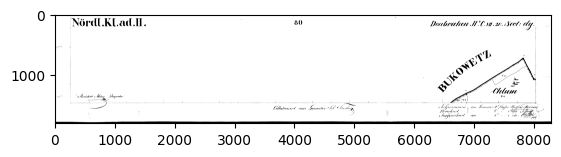

In [303]:
# todo 
right_border, left_border, bottom_border, top_border = get_sizes_procentual(0.01)
print(bottom_border, top_border, right_border, left_border)
print(img.shape)
img = img[bottom_border:top_border, right_border:left_border]

plt.imshow(img, cmap="gray")


In [304]:
# Taking the right 90% of the image.
right_border = int(img.shape[1] * 0.9)
# Taking the left 10% of the image.
left_border = int(img.shape[1] * 0.1)
# Taking the bottom 90% of the image.
bottom_border = int(img.shape[0] * 0.9)
# Taking the top 10% of the image.
top_border = int(img.shape[0] * 0.1)

# Taking the right, left, bottom and top border of the image.
right_border = img[:, right_border:]
left_border = img[:, :left_border]
bottom_border = img[bottom_border:, :]
top_border = img[:top_border, :]
print(top_border.shape)
# top_border = top_border.astype(int)
# top_border = img_as_ubyte(top_border)
print(top_border[:5])

(181, 8282)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [305]:
def euclidean_2D(x1, x2, y1, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [306]:


def get_vertical(x1, x2, y1, y2, theta=0.1, min_value=10):
    """
    computes if is line vertical or horisontal like by parameters theta as and min_value
    """

    if np.square(x1 - x2) < theta and np.square(y1 - y2) > min_value:
        return True
    elif np.square(x1 - x2) > min_value and np.square(y1 - y2) < theta:
        return False

    


In [307]:




def make_line_detection(border, horisontal_only=False, vertical_only=False):

    if horisontal_only:
        for _ in range(9):
            border = convolve_horizontal_lightly(border)
    elif vertical_only:
        for _ in range(9):
            border = convolve_vertical_lightly(border)

    # Create default parametrization LSD
    lsd = cv2.createLineSegmentDetector(0)

    # Detect lines in the image
    lines = lsd.detect(border)[0]  # Position 0 of the returned tuple are the detected lines
    lines = np.squeeze(lines)

    
    # directions = np.array([get_vertical(i[0], i[2], i[1], i[3], 0.1, 20)  for i in lines])
    # vertical = lines[directions == False,:]
    # print("vertical", vertical.shape)
    # horisontal = lines[directions == True,:]
    # print("horisontal", horisontal.shape)

    # if horisontal_only:
    #     lines = horisontal

    # elif vertical_only:
    #     lines = vertical


    print(lines.shape)
    distances = np.array([euclidean_2D(i[0], i[2], i[1], i[3],)  for i in lines])
    print("distances.shape", distances.shape)

    print(distances.shape)
    plt.plot(np.arange(0, len(distances)), distances)
    plt.show()
    longest_lines = lines[distances > np.percentile(distances, 75)]
    # longest_lines = lines
    print("longest_lines.shape", longest_lines.shape)

    longest_lines = longest_lines.astype(int)
    print(longest_lines)

    border[:,:] = 255

    # Draw detected lines in the image
    for i in longest_lines:
        border = cv2.line(border, (i[0], i[1]), (i[2], i[3]), (0))
    print(border.shape)
    # It converts the image from BGR to grayscale.
    # drawn_img = cv2.cvtColor(white, cv2.COLOR_BGR2GRAY)
    plt.imshow(border, cmap="gray")
    # return border

(1966, 4)
distances.shape (1966,)
(1966,)


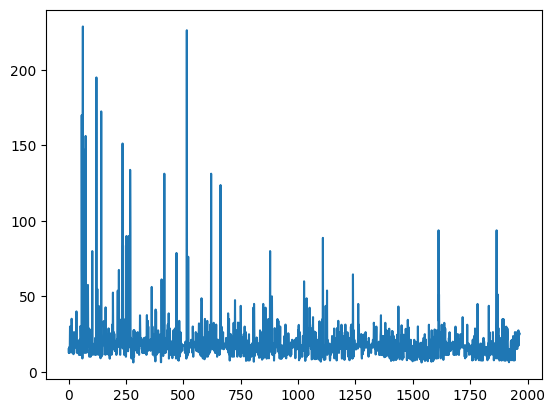

longest_lines.shape (492, 4)
[[ 242 1140  244 1170]
 [ 284 1151  286 1129]
 [ 544 1465  540 1500]
 ...
 [ 173 1708  173 1681]
 [ 133  889  133  864]
 [ 139 1614  139 1589]]
(1812, 829)


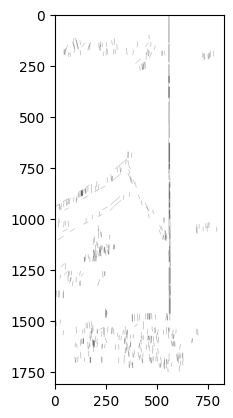

In [308]:
make_line_detection(right_border, vertical_only=True)

(890, 4)
distances.shape (890,)
(890,)


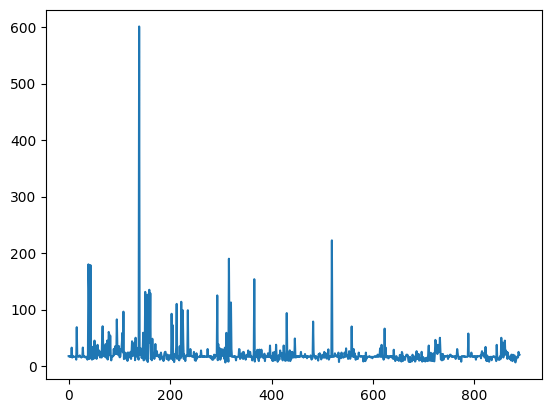

longest_lines.shape (223, 4)
[[ 809 1453  808 1485]
 [ 660  159  660   90]
 [ 600 1413  596 1445]
 [ 260  533  261  713]
 [ 259  714  259  851]
 [ 260 1170  259 1349]
 [  50 1389   47 1355]
 [ 265  154  264  109]
 [ 459  103  459  124]
 [ 263 1394  264 1368]
 [ 113  561  115  536]
 [ 264 1365  264 1328]
 [ 510  190  510  211]
 [ 575 1733  573 1705]
 [  96 1388   93 1366]
 [  56 1356   53 1381]
 [ 441  185  437  138]
 [ 434  136  443  206]
 [ 627  164  629  126]
 [ 500  154  494  119]
 [ 596 1636  593 1675]
 [  80 1351   76 1386]
 [ 265  633  264  588]
 [ 630  105  624  165]
 [ 592  143  605  198]
 [ 481   94  478   74]
 [ 656   63  659  116]
 [ 558 1653  561 1683]
 [ 626  166  631  191]
 [ 425   78  429  113]
 [  32  570   29  544]
 [ 596 1359  596 1380]
 [ 520  204  521  121]
 [ 498  146  492  183]
 [ 556  115  562  149]
 [ 406  146  411  181]
 [ 299   94  298  124]
 [ 653 1440  655 1411]
 [ 490  195  500  155]
 [ 543  143  544  201]
 [ 783  186  787  209]
 [ 714   93  715  189]
 [  4

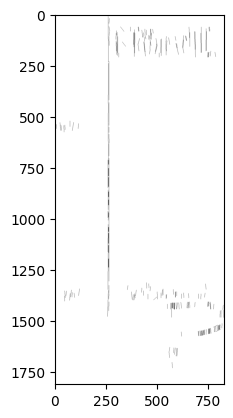

In [309]:
make_line_detection(left_border, vertical_only=True)

(1162, 4)
distances.shape (1162,)
(1162,)


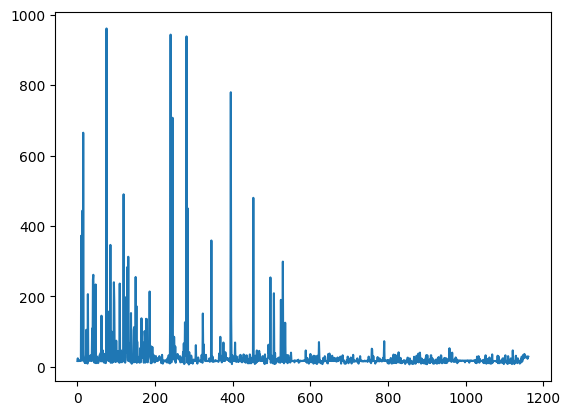

longest_lines.shape (291, 4)
[[5801   14 5429   13]
 [6691  158 6721  159]
 [5383   15 5446   15]
 ...
 [6280  138 6309  138]
 [ 869  128  895  128]
 [6270  160 6299  160]]
(181, 8282)


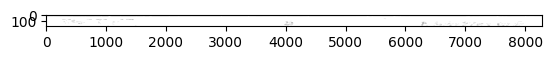

In [310]:
make_line_detection(top_border, horisontal_only=True)

(793, 4)
distances.shape (793,)
(793,)


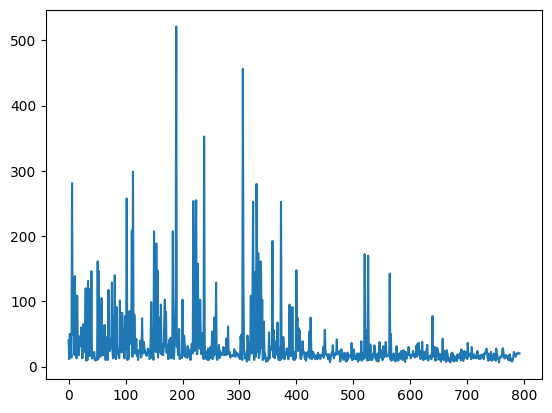

longest_lines.shape (198, 4)
[[7756   10 7796    2]
 [8280  152 8230  154]
 [7283  153 7243  154]
 [1469  157 1188  157]
 [1089  158 1040  158]
 [6550  153 6446  153]
 [2579  157 2443  157]
 [5919  153 5780  153]
 [8228  153 8181  154]
 [6383  154 6284  155]
 [1359  159 1468  159]
 [7936   87 7894   87]
 [1140  159 1186  160]
 [1179  157 1141  157]
 [2670  160 2701  160]
 [4453  157 4513  155]
 [2699  159 2664  158]
 [6191  155 6126  154]
 [6426  153 6385  153]
 [7974   42 7903   41]
 [6250  156 6370  157]
 [3136  158 3166  158]
 [5151  158 5283  158]
 [ 174  163  293  163]
 [6399   11 6463    5]
 [6458  156 6604  156]
 [5101  156 4940  155]
 [1918  154 1771  154]
 [1005  160  934  159]
 [5559  155 5454  154]
 [3726  155 3768  157]
 [7445  154 7509  155]
 [6771   71 6816   69]
 [5800  156 5918  155]
 [5619  158 5650  160]
 [7913   39 7954   36]
 [4374  155 4340  154]
 [7529  155 7658  156]
 [3859  154 3781  154]
 [6761  154 6621  154]
 [3036  160 3128  158]
 [7413  153 7311  155]
 [575

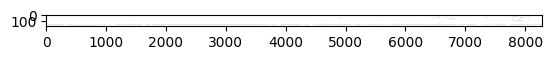

In [311]:
make_line_detection(bottom_border, horisontal_only=True)
